In [2]:
%env CUDA_VISIBLE_DEVICES=MIG-768d9c1d-110f-52e2-b0a2-3252f78280f8
device="cuda:0"
import torch
from diffusers.utils import load_image
from diffusers import FluxControlNetModel
from diffusers.pipelines import FluxControlNetPipeline
controlnet = FluxControlNetModel.from_pretrained(
  "jasperai/Flux.1-dev-Controlnet-Upscaler",
  torch_dtype=torch.bfloat16
)
pipe = FluxControlNetPipeline.from_pretrained(
  "black-forest-labs/FLUX.1-dev",
  controlnet=controlnet,
  torch_dtype=torch.bfloat16
).to("cuda")

env: CUDA_VISIBLE_DEVICES=MIG-768d9c1d-110f-52e2-b0a2-3252f78280f8


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [25]:
control_image = load_image(
  "compressed.png"
)
w, h = control_image.size
control_image = control_image.resize((w * 2, h * 2))

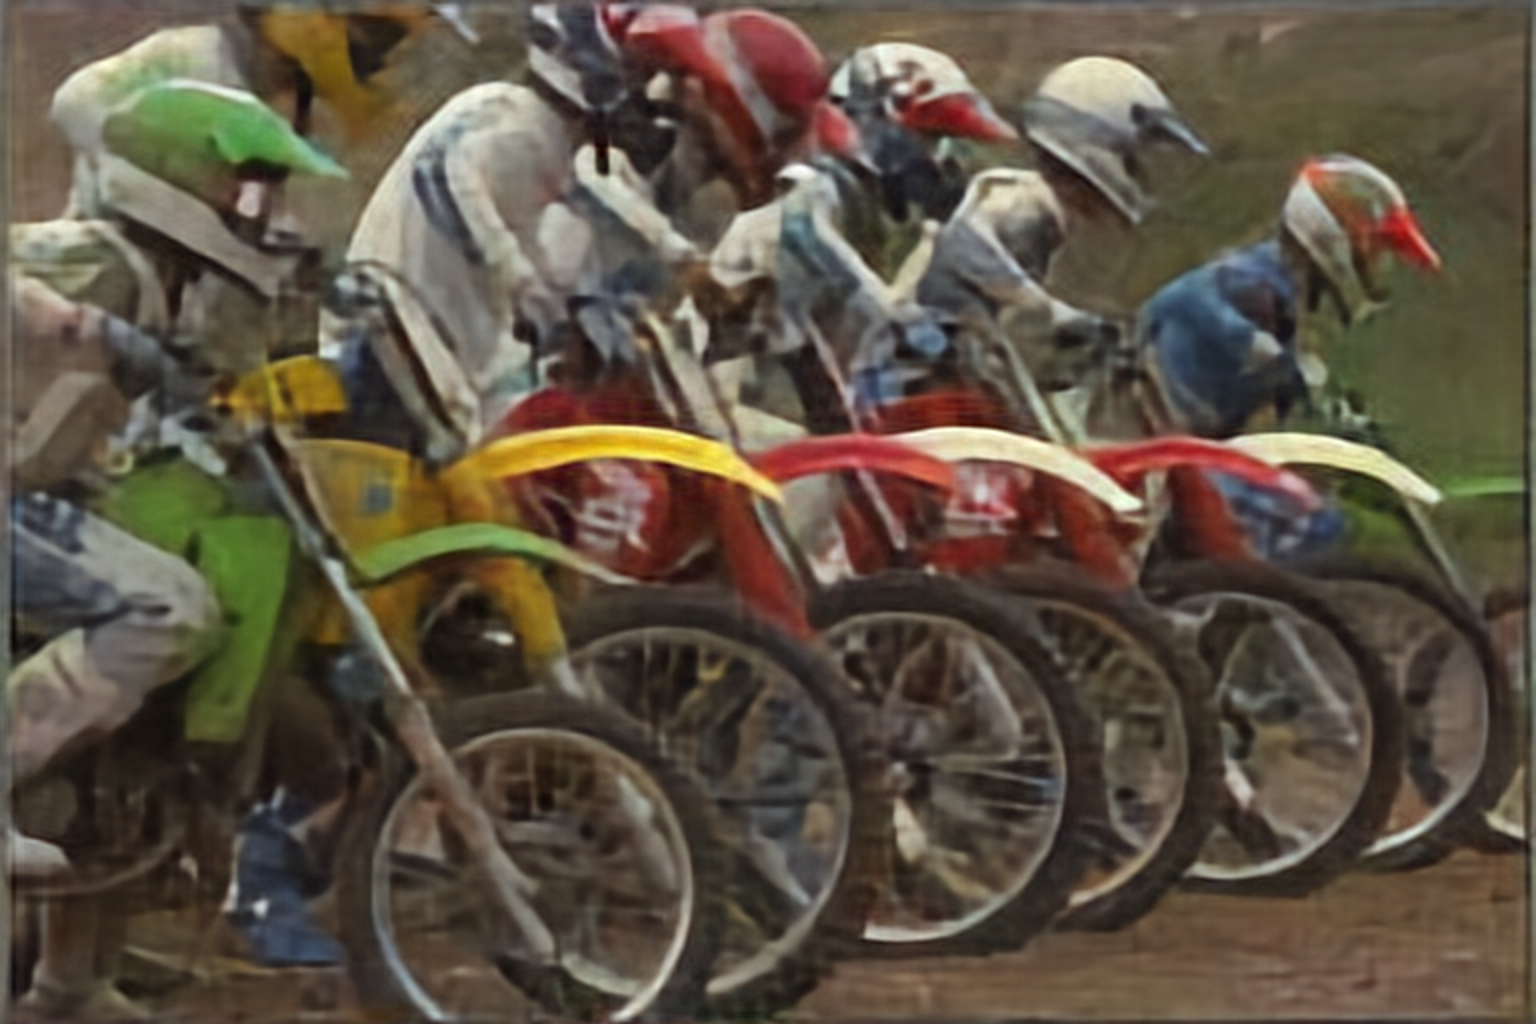

In [26]:
control_image

  0%|          | 0/28 [00:00<?, ?it/s]

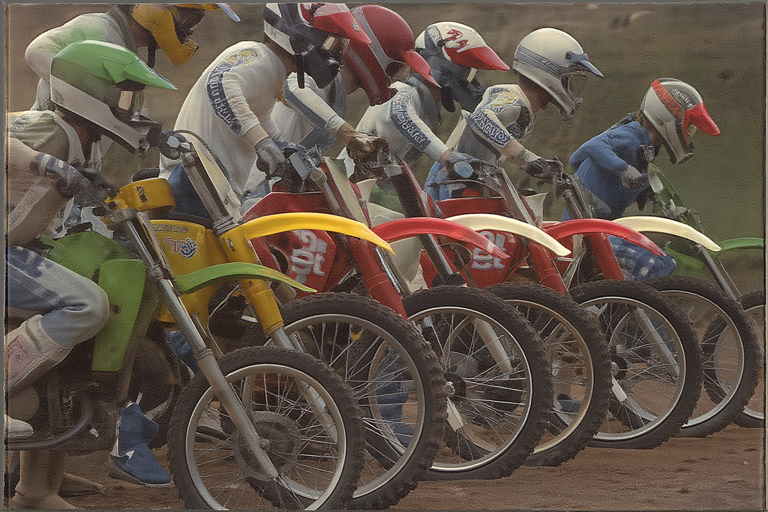

In [28]:
image = pipe(
    prompt="", 
    control_image=control_image,
    controlnet_conditioning_scale=0.6,
    num_inference_steps=28, 
    guidance_scale=3.5,
    height=control_image.size[1],
    width=control_image.size[0]
).images[0].resize((w,h))
image

In [ ]:
image = pipe(
    prompt="", 
    control_image=control_image,
    controlnet_conditioning_scale=0.6,
    num_inference_steps=56, 
    guidance_scale=3.5,
    height=control_image.size[1],
    width=control_image.size[0]
).images[0].resize((w,h))
image

  0%|          | 0/56 [00:00<?, ?it/s]